In [1]:
import itertools
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
# load features df from csv (for the NER gold labels)

train_df = pd.read_csv('train_features.tsv', sep='\t', keep_default_na=False)
test_df = pd.read_csv('test_features.tsv', sep='\t', keep_default_na=False)

In [4]:
# load list of dictionaries (for X features)

with open('train_X_features.json', 'r') as infile:
    train_feat_dict_list = json.load(infile)

with open('test_X_features.json', 'r') as infile:
    test_feat_dict_list = json.load(infile)

In [5]:
# vectorize, fit, transform

vec = DictVectorizer()

X_train = vec.fit_transform(train_feat_dict_list)
y_train = list(train_df.NER_gold)

X_test = vec.transform(test_feat_dict_list)
y_test = list(test_df.NER_gold)

In [7]:
# train Multinomial Naive Bayes

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# training accuracy

y_pred_mnb_train = mnb.predict(X_train)

print(f"Training accuracy: {accuracy_score(y_train, y_pred_mnb_train).round(2)}")

Training accuracy: 0.96


In [9]:
# testing accuracy

y_pred_mnb = mnb.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred_mnb).round(2)}")

Test accuracy: 0.95


In [10]:
# other metrics

for avg in ['micro', 'macro', 'weighted']:
    print(f"Precision ({avg}): {precision_score(y_test, y_pred_mnb, average=avg).round(2)}")
    print(f"Recall ({avg}): {recall_score(y_test, y_pred_mnb, average=avg).round(2)}")
    print(f"F1-score ({avg}): {f1_score(y_test, y_pred_mnb, average=avg).round(2)}")

Precision (micro): 0.95
Recall (micro): 0.95
F1-score (micro): 0.95
Precision (macro): 0.82
Recall (macro): 0.8
F1-score (macro): 0.81
Precision (weighted): 0.95
Recall (weighted): 0.95
F1-score (weighted): 0.95


Confusion matrix, without normalization
Normalized confusion matrix


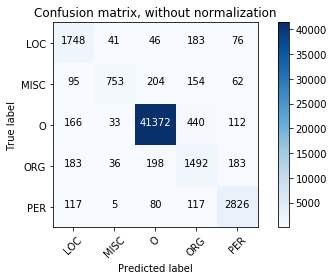

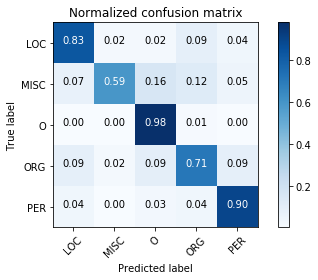

In [11]:
# confusion matrix
# this code is taken from here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cm = confusion_matrix(y_test, y_pred_mnb)

class_names = ['LOC', 'MISC', 'O', 'ORG', 'PER']

plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [12]:
# train Complement Naive Bayes

cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [13]:
# training accuracy

y_pred_cnb_train = cnb.predict(X_train)

print(f"Training accuracy: {accuracy_score(y_train, y_pred_cnb_train).round(2)}")

Training accuracy: 0.96


In [14]:
# testing accuracy

y_pred_cnb = cnb.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred_cnb).round(2)}")

Test accuracy: 0.95


In [15]:
# other metrics

for avg in ['micro', 'macro', 'weighted']:
    print(f"Precision ({avg}): {precision_score(y_test, y_pred_cnb, average=avg).round(2)}")
    print(f"Recall ({avg}): {recall_score(y_test, y_pred_cnb, average=avg).round(2)}")
    print(f"F1-score ({avg}): {f1_score(y_test, y_pred_cnb, average=avg).round(2)}")

Precision (micro): 0.95
Recall (micro): 0.95
F1-score (micro): 0.95
Precision (macro): 0.82
Recall (macro): 0.84
F1-score (macro): 0.83
Precision (weighted): 0.95
Recall (weighted): 0.95
F1-score (weighted): 0.95


Confusion matrix, without normalization
Normalized confusion matrix


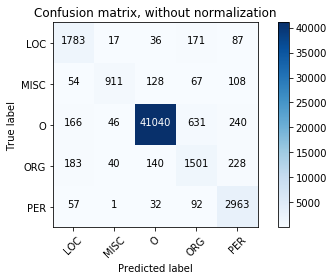

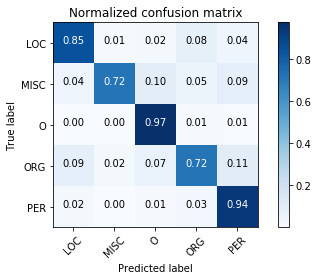

In [16]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred_cnb)

class_names = ['LOC', 'MISC', 'O', 'ORG', 'PER']

plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()